# Bankruptcy Detection

## Introduction
- Bankruptcy Detection is a kind of Anomaly detection, which can identify of rare items or suspicions, widely applied for fraud detection, structural defect, medical problems detection and so on. 
- The dataset is about bankruptcy prediction of Polish companies. The bankcrupt companies were during the period 2000-2012, while the still operating companies were from 2007 to 2013. This data was created by Sebastian Tomczak. (source: https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data or https://www.kaggle.com/datasets/bhadaneeraj/bankruptcy-detection)
- The target of this project is to find a suitable machine learning model with high score. AUC, accuracy, precision, recall, f1 will be tested and the hyperparameter optimization for model is to achieve the highest "roc_auc" Score.

Five scores are used in this project:

- AUC:AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

- Accuracy: (TN+TP) / (TN+FP+FN+TP)

- Precision: TP / (FP+TP), typicall for cancer detection, which is also important for bankruptcy prediction. We care about not missing any positive case, thus precision is important.

- Recall:TP/(TP+FN), also named as sensitivity, means returning most of the relevant results 

- F1: 2*TP /(2*TP+FP+FN) which includes precision and sensitivity

Github: https://github.com/Mengdie-Zhang/Bankruptcy-Prediction

In [118]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import gc


# import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc, precision_score, f1_score, recall_score,roc_auc_score 

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tempfile import mkdtemp

# using this code to install xgb "conda install -c conda-forge py-xgboost"


## Content
### A) Data Exploration
### B) Data Pre-processing
### C) Model Selection
### D) Feature engineering 
### E) Results & Discussion
### F) Limitations

##  A) Data Exploration

### Dataset  Information:

The data was collected from Emerging Markets Information Service, which is a database containing information on emerging markets around the world. 
There are 5 files in this dataset, which depend on the forecasting period:
- 1stYear.csv: the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.
- 2ndYear.csv: the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. The data contains 10173 instances (financial statements), 400 represents bankrupted companies, 9773 firms that did not bankrupt in the forecasting period.
- 3rdYear.csv: the data contains financial rates from 3rd year of the forecasting period and corresponding class label that indicates bankruptcy status after 3 years. The data contains 10503 instances (financial statements), 495 represents bankrupted companies, 10008 firms that did not bankrupt in the forecasting period.
- 4thYear.csv: the data contains financial rates from 4th year of the forecasting period and corresponding class label that indicates bankruptcy status after 2 years. The data contains 9792 instances (financial statements), 515 represents bankrupted companies, 9277 firms that did not bankrupt in the forecasting period.
- 5thYear.csv: the data contains financial rates from 5th year of the forecasting period and corresponding class label that indicates bankruptcy status after 1 year. The data contains 5910 instances (financial statements), 410 represents bankrupted companies, 5500 firms that did not bankrupt in the forecasting period.

#### Attribute Information:

- X1 net profit / total assets
- X2 total liabilities / total assets
- X3 working capital / total assets
- X4 current assets / short-term liabilities
- X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
- X6 retained earnings / total assets
- X7 EBIT / total assets
- X8 book value of equity / total liabilities
- X9 sales / total assets
- X10 equity / total assets
- X11 (gross profit + extraordinary items + financial expenses) / total assets
- X12 gross profit / short-term liabilities
- X13 (gross profit + depreciation) / sales
- X14 (gross profit + interest) / total assets
- X15 (total liabilities * 365) / (gross profit + depreciation)
- X16 (gross profit + depreciation) / total liabilities
- X17 total assets / total liabilities
- X18 gross profit / total assets
- X19 gross profit / sales
- X20 (inventory * 365) / sales
- X21 sales (n) / sales (n-1)
- X22 profit on operating activities / total assets
- X23 net profit / sales
- X24 gross profit (in 3 years) / total assets
- X25 (equity - share capital) / total assets
- X26 (net profit + depreciation) / total liabilities
- X27 profit on operating activities / financial expenses
- X28 working capital / fixed assets
- X29 logarithm of total assets
- X30 (total liabilities - cash) / sales
- X31 (gross profit + interest) / sales
- X32 (current liabilities * 365) / cost of products sold
- X33 operating expenses / short-term liabilities
- X34 operating expenses / total liabilities
- X35 profit on sales / total assets
- X36 total sales / total assets
- X37 (current assets - inventories) / long-term liabilities
- X38 constant capital / total assets
- X39 profit on sales / sales
- X40 (current assets - inventory - receivables) / short-term liabilities
- X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))
- X42 profit on operating activities / sales
- X43 rotation receivables + inventory turnover in days
- X44 (receivables * 365) / sales
- X45 net profit / inventory
- X46 (current assets - inventory) / short-term liabilities
- X47 (inventory * 365) / cost of products sold
- X48 EBITDA (profit on operating activities - depreciation) / total assets
- X49 EBITDA (profit on operating activities - depreciation) / sales
- X50 current assets / total liabilities
- X51 short-term liabilities / total assets
- X52 (short-term liabilities * 365) / cost of products sold)
- X53 equity / fixed assets
- X54 constant capital / fixed assets
- X55 working capital
- X56 (sales - cost of products sold) / sales
- X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
- X58 total costs /total sales
- X59 long-term liabilities / equity
- X60 sales / inventory
- X61 sales / receivables
- X62 (short-term liabilities *365) / sales
- X63 sales / short-term liabilities
- X64 sales / fixed assets


All info is cited from https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

In this project, I just use 1stYear.csv's data

In [119]:
train_df = pd.read_csv("data/1year.csv")
train_df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0,4.1486,3.2732,107.350,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.241140,0.81774,0.76599,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0


In [120]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7012 non-null   object 
 1   Attr2   7012 non-null   object 
 2   Attr3   7012 non-null   object 
 3   Attr4   7012 non-null   object 
 4   Attr5   7012 non-null   object 
 5   Attr6   7012 non-null   object 
 6   Attr7   7012 non-null   object 
 7   Attr8   7012 non-null   object 
 8   Attr9   7012 non-null   object 
 9   Attr10  7012 non-null   object 
 10  Attr11  7012 non-null   object 
 11  Attr12  7012 non-null   object 
 12  Attr13  7012 non-null   float64
 13  Attr14  7012 non-null   object 
 14  Attr15  7012 non-null   object 
 15  Attr16  7012 non-null   object 
 16  Attr17  7012 non-null   object 
 17  Attr18  7012 non-null   object 
 18  Attr19  7012 non-null   float64
 19  Attr20  7012 non-null   float64
 20  Attr21  7012 non-null   object 
 21  Attr22  7012 non-null   object 
 22  

## B) Data Pre-processing
- tranform the type
- check the distribution
- check "0" value
- deal with NULL

In [121]:
# There are 49 features'data type are object, but we know they should be numeric from the description of Attribute Information
# Thus, transfer object dtypes to numeric dtypes
# Code reference: https://www.kaggle.com/code/rewins/bankrupcy-dectection
for i in range(1, 65):
    train_df[f'Attr{i}'] = pd.to_numeric(train_df[f'Attr{i}'], errors='coerce')

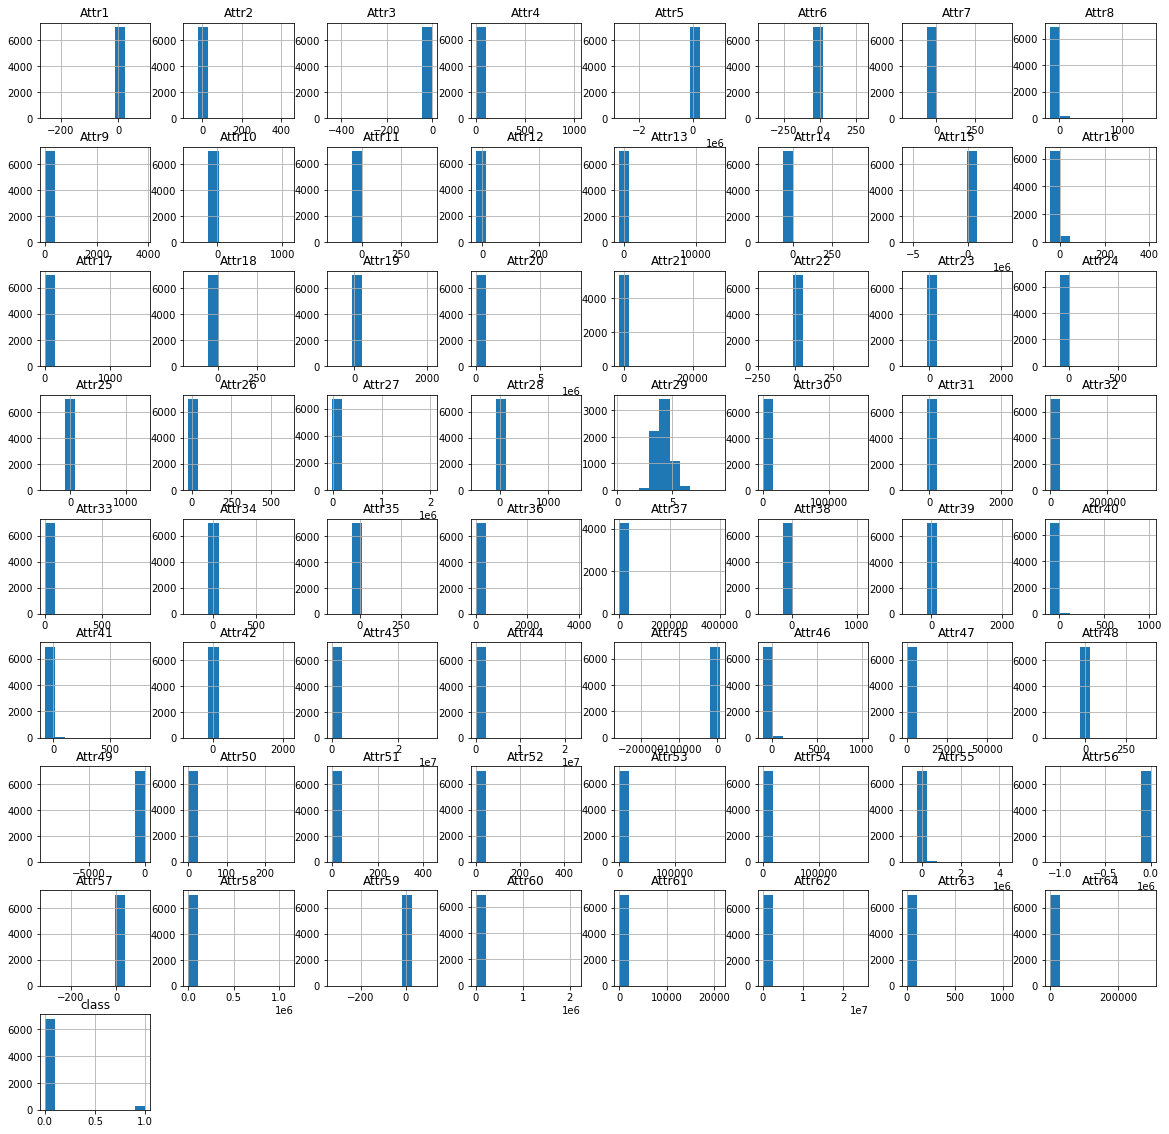

In [122]:
# using histgraph to check the distribution of data, it is clear that the data distribution of all features is very densive
train_df.hist(figsize=(20,20))
plt.show()

In [123]:
# Checking the unique values for each column : one unique value features and too many unique value features
# From the result, we can know that most features are have various values
one_value_cols = [col for col in train_df.columns if train_df[col].nunique() <= 1]
toomany_value_cols = [col for col in train_df.columns if train_df[col].nunique() >= (0.6*train_df.shape[0])]
print(f'There are {len(one_value_cols)} columns with only one unique value.')
print(f'There are {len(toomany_value_cols)} columns with more than 60% of samples unique values')

There are 0 columns with only one unique value.
There are 60 columns with more than 60% of samples unique values


In [124]:
# Checking "0" data
def Checking_ZERO(data):
    numbers = []
    percents = []
    data_types = []
    for col in data.columns:
        count = (data[col] == 0).sum()
        percent = count/data.shape[0]*100
        data_type = str(data[col].dtype)
        numbers.append(count)
        percents.append(percent)
        data_types.append(data_type)
    results = pd.DataFrame()
    results['Number'] = numbers
    results['Percent'] = percents
    results['Data_types'] = data_types
    return(np.transpose(results))

In [125]:
# # Checking the "0" values in train_df 
zero_data = Checking_ZERO(train_df)
display(zero_data)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Number,45,23,20,1,19,2669,4,0,0,0,...,1,85,3,2739,0,0,30,0,0,6756
Percent,0.641757,0.328009,0.285225,0.014261,0.270964,38.06332,0.057045,0.0,0.0,0.0,...,0.014261,1.212208,0.042784,39.061609,0.0,0.0,0.427838,0.0,0.0,96.349116
Data_types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


In [126]:
# define the function to find uesless features
def useless_features(Nan_percent,df):
    useless_list = []
    for col in df.columns:
        if df[col]["Percent"] > Nan_percent:
            useless_list.append(col)
    return useless_list

In [127]:
# check the features with more than 20% of "0"
# colum64 is our label which is reasonal for having lots of "0", but Attr5 and Attr58 with over 20% of "0" may due to 
# mis-manipulated data. Thus we will deal with it in feature engineering step
cols_tooMany0 = useless_features(20,zero_data)
display(cols_tooMany0)

[5, 58, 64]

In [128]:
# Checking missing data
def Checking_NaN(data):
    number = data.isnull().sum()
    percent = (data.isnull().sum()/data.shape[0]*100)
    results = pd.concat([number, percent], axis=1, keys=['Number', 'Percent'])
    data_types = []
    for col in data.columns:
        data_type = str(data[col].dtype)
        data_types.append(data_type)
    results['Data_types'] = data_types
    return(np.transpose(results))

In [129]:
# Checking the missing values in train_df
missing_data = Checking_NaN(train_df)
display(missing_data)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
Number,3,3,3,30,8,3,3,25,1,3,...,0,1,0,1,135,22,0,30,34,0
Percent,0.042784,0.042784,0.042784,0.427838,0.11409,0.042784,0.042784,0.356532,0.014261,0.042784,...,0.0,0.014261,0.0,0.014261,1.925271,0.313748,0.0,0.427838,0.484883,0.0
Data_types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


In [130]:
# drop the features with more than 50% of missing data
drop_cols_list = useless_features(50,missing_data)
train_df.drop(drop_cols_list, axis=1,inplace = True)

In [131]:
# checking the how many kinds of data types in all columns
col_dtypes = missing_data.loc["Data_types"].value_counts()
display(col_dtypes)

float64    64
int64       1
Name: Data_types, dtype: int64

In [132]:
#seperate the features with label
X = train_df.drop(['class'], axis=1)
y = train_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

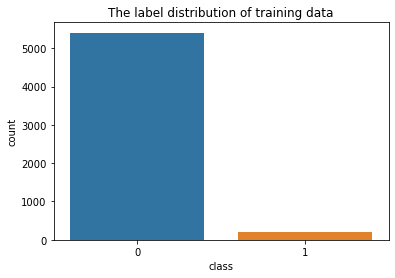

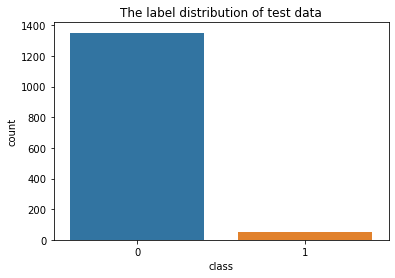

In [133]:
sns.countplot(x=y_train)
plt.title("The label distribution of training data")
plt.show()

sns.countplot(x=y_test)
plt.title("The label distribution of test data")
plt.show()

In [134]:
# fill the NaN with -999 in all columns
new_train_df =train_df.copy()
new_train_df =new_train_df.fillna(-999)

In [135]:
# Create inspect_file function to check whether there are null values in each column
def inspect_dataframe(dfname):
    print("Any missing values? "+str(dfname.isna().any().any()))
    if dfname.isna().any().any()== True:
        print("Since there is NaN in this dataframe, the result of each column's missing values checking is showing as follows: ")
        print(dfname.isna().any())
    print()

In [136]:
# check the columns with null values 
inspect_dataframe(new_train_df)

Any missing values? False



In [137]:
#80%of data to training the model, and 20% of data to test the model 
y2 = new_train_df.loc[:,"class"]
X2 = new_train_df.copy
X2 = new_train_df.drop("class", axis =1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state = 42) 

## C) Model Selection
- Logistic Regrssion
- SVM 
- Bagging: Random Forest
- Boosting: Xgboost
###  Logistic Regression

In [138]:

logit = LogisticRegression(solver = "lbfgs")
logit.fit(X2_train, y2_train)

train_score = logit.score(X2_train, y2_train)
test_score = logit.score(X2_test, y2_test)

print(f'accuary score for training data is: {train_score}')
print(f'accuary score for test data is: {test_score}')

accuary score for training data is: 0.9648778748440007
accuary score for test data is: 0.9565217391304348


In [139]:
feature_names = new_train_df.columns
feature_names=feature_names[:-1]

Text(0.5, 1.0, ' Features Importance')

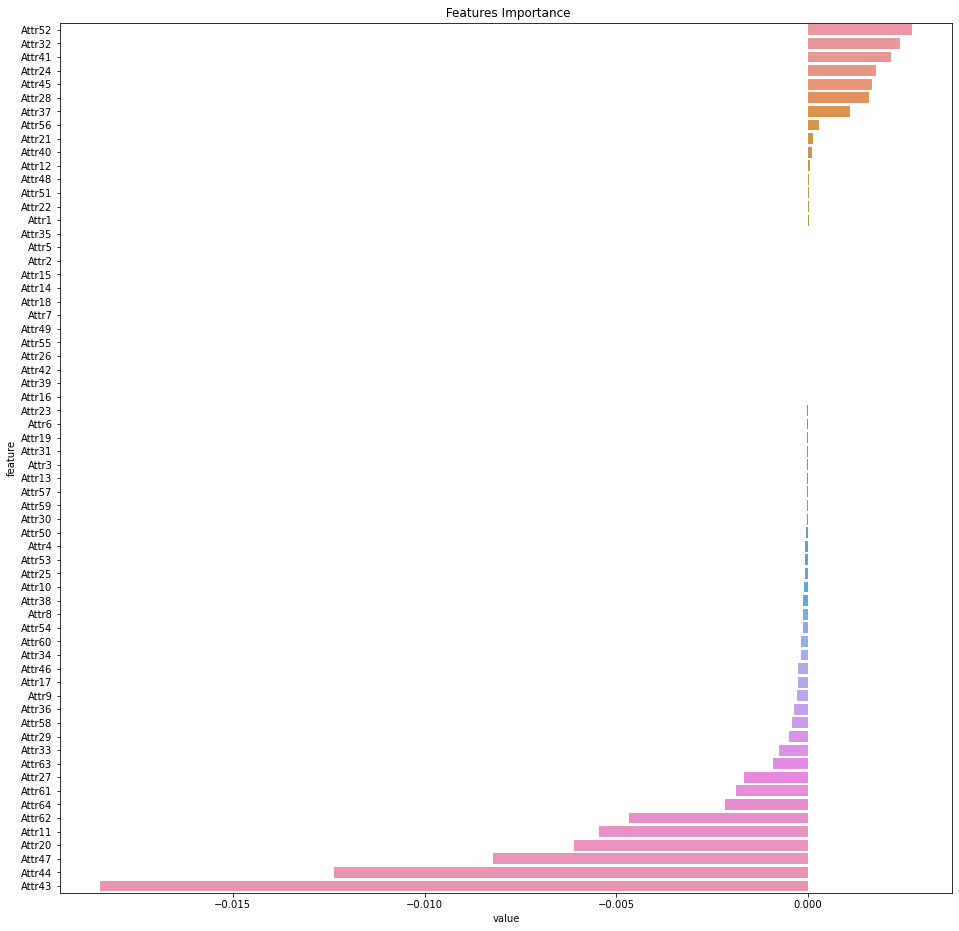

In [140]:
logit_importances = pd.DataFrame()
logit_importances['value']=pd.Series(logit.coef_[0])
logit_importances["feature"]=feature_names
plt.figure(figsize=(16, 16))
sns.barplot(data=logit_importances.sort_values(by=['value'], ascending=False), x='value', y='feature');
plt.title(f' Features Importance')

In [141]:
def plot_Scores(model,X2_test, y2_test):
    y_pred = model.predict(X2_test)
    
    #plot Area Under Curve
    plt.figure()
    false_positive_rate, recall, thresholds = roc_curve(y2_test, y_pred)
    roc_auc = auc(false_positive_rate, recall)
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('False_positive_rate')
    plt.show()
    
    #plot the confustion matrix using sns
    cm = confusion_matrix(y2_test, y_pred.round())
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()

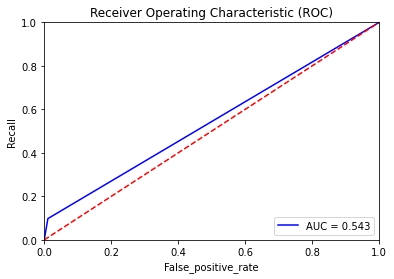

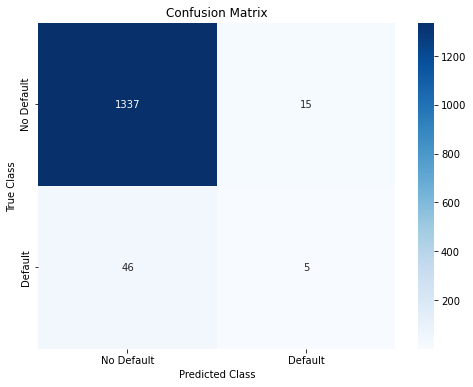

In [142]:
plot_Scores(logit,X2_test, y2_test)

In [143]:
def print_Scores(model,X2_test,y2_test):
    y_pred = model.predict(X2_test)
    
    false_positive_rate, recall, thresholds = roc_curve(y2_test, y_pred)
    roc_auc = auc(false_positive_rate, recall)
    acc = accuracy_score(y2_test, y_pred.round())
    precision = precision_score(y2_test, y_pred.round())
    f1 = f1_score(y2_test, y_pred.round())
    recall = recall_score(y2_test, y_pred.round())
    print(f'Accuracy: {acc}')
    print(f'Precision(positive predictive value):{precision}')
    print(f'f1_score:{f1}')
    print(f'recall_score:{recall}')
    print()
    results=[roc_auc,acc,precision,recall,f1]
    return results

In [144]:
score_res = pd.DataFrame(index=["AUC","ACC","Precision","Recall","F1"])
score_res["Logistic"] =print_Scores(logit,X2_test,y2_test)

Accuracy: 0.9565217391304348
Precision(positive predictive value):0.25
f1_score:0.14084507042253522
recall_score:0.09803921568627451



###  SVM 

In [145]:
SVM_model = LinearSVC()
SVM_model.fit(X2_train,y2_train)
print("The TRAIN classification accuracy is: %3.3f" % (100 * SVM_model.score(X2_train,y2_train)))

The TRAIN classification accuracy is: 93.279


In [146]:
SVM_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

Text(0.5, 1.0, ' Features Importance')

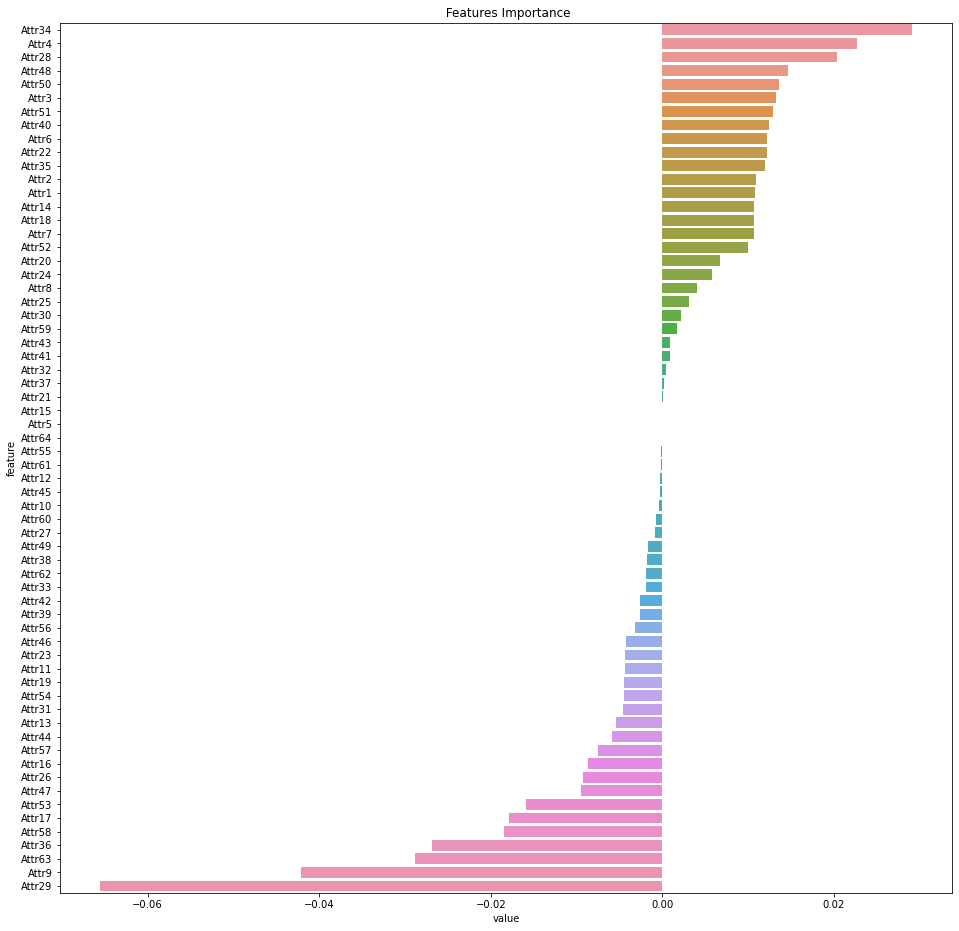

In [147]:
SVM_importances = pd.DataFrame()
SVM_importances['value']=pd.Series(SVM_model.coef_[0])
SVM_importances["feature"]=feature_names
plt.figure(figsize=(16, 16))
sns.barplot(data=SVM_importances.sort_values(by=['value'], ascending=False), x='value', y='feature');
plt.title(f' Features Importance')

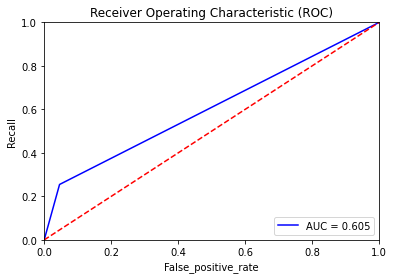

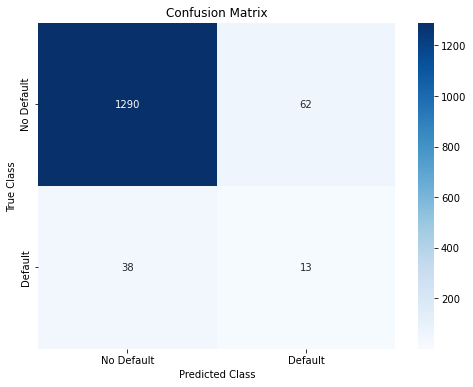

Accuracy: 0.9287241625089094
Precision(positive predictive value):0.17333333333333334
f1_score:0.20634920634920637
recall_score:0.2549019607843137



In [148]:
#Polt Area Under Curve, cofusion Matrix
plot_Scores(SVM_model,X2_test, y2_test)
#print the scores
score_res["SVM"] =print_Scores(SVM_model,X2_test,y2_test)

### Bagging: Random Forest

In [149]:
my_random_forest = RandomForestClassifier(n_estimators=50)
my_random_forest.fit(X2_train, y2_train)

RandomForestClassifier(n_estimators=50)

Text(0.5, 1.0, ' Features Importance')

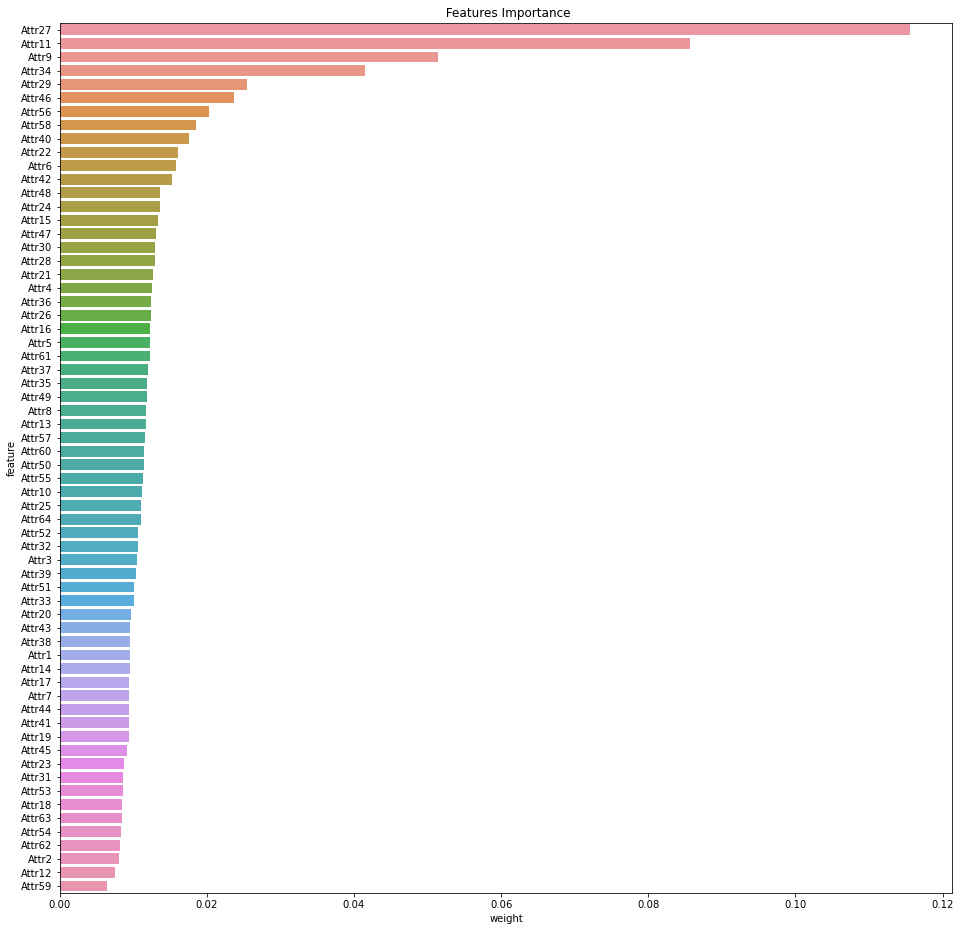

In [150]:
importances = my_random_forest.feature_importances_
forest_importances = pd.DataFrame(importances, index=feature_names,columns=['weight'])
forest_importances["feature"]=feature_names
plt.figure(figsize=(16, 16))
sns.barplot(data=forest_importances.sort_values(by=['weight'], ascending=False), x='weight', y='feature');
plt.title(f' Features Importance')

In [151]:
decision_tree_scores = []
for  sub_tree in my_random_forest.estimators_:
    decision_tree_scores.append(sub_tree.score(X2_test, y2_test))
    
print("Performance on fitted data:")
print("Best Decision Tree: %3.3f" % (100*max(decision_tree_scores)))
print("Worst Decision Tree: %3.3f" % (100*min(decision_tree_scores)))
print("Average Decision Tree: %3.3f" % (100*np.mean(decision_tree_scores)))
print("Random Forest: %3.3f" % (100*my_random_forest.score(X2_test, y2_test)))

Performance on fitted data:
Best Decision Tree: 96.793
Worst Decision Tree: 93.371
Average Decision Tree: 95.282
Random Forest: 98.361


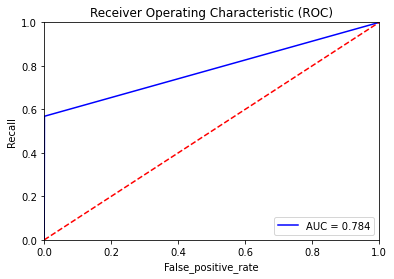

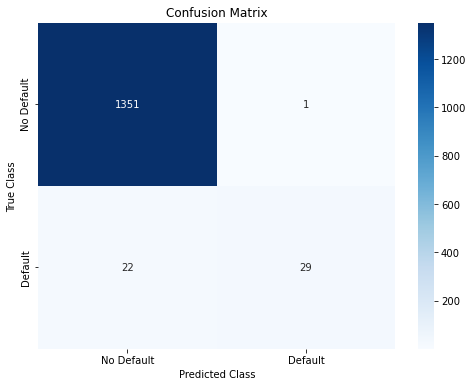

Accuracy: 0.9836065573770492
Precision(positive predictive value):0.9666666666666667
f1_score:0.7160493827160493
recall_score:0.5686274509803921



In [152]:
#Polt Area Under Curve, cofusion Matrix
plot_Scores(my_random_forest,X2_test, y2_test)
#print the scores
score_res["Random Forest"] =print_Scores(my_random_forest,X2_test,y2_test)

### Boosting: Xgboost

In [153]:
scalar = StandardScaler()
scalar.fit(X2_train)
X2_train = scalar.transform(X2_train)
X2_test = scalar.transform(X2_test)

XGB_model = XGBClassifier()
XGB_model.fit(X2_train,y2_train)

print("XG Boost score: %3.3f" % (100 * XGB_model.score(X2_test,y2_test)))

[23:19:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost score: 98.646


Text(0.5, 1.0, ' Features Importance')

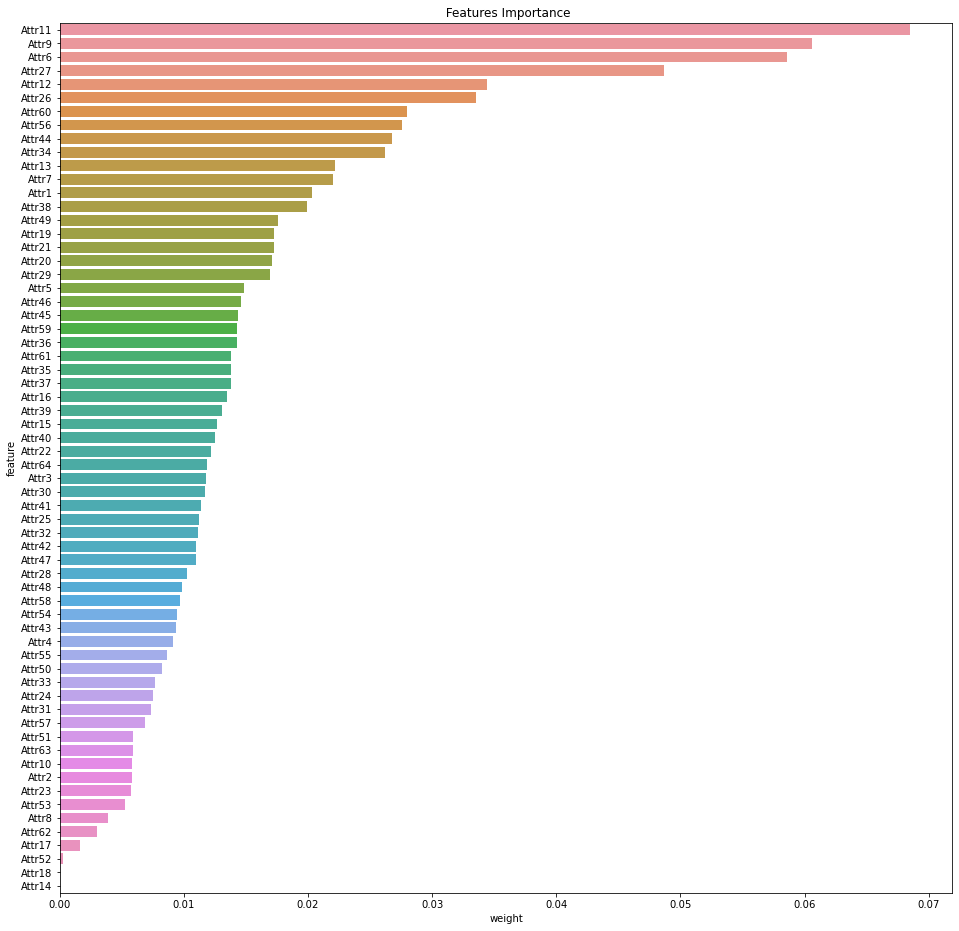

In [154]:
XGB_importances = XGB_model.feature_importances_
XGB_importances = pd.DataFrame(XGB_importances, index=feature_names,columns=['weight'])
XGB_importances["feature"]=feature_names
plt.figure(figsize=(16, 16))
sns.barplot(data=XGB_importances.sort_values(by=['weight'], ascending=False), x='weight', y='feature');
plt.title(f' Features Importance')

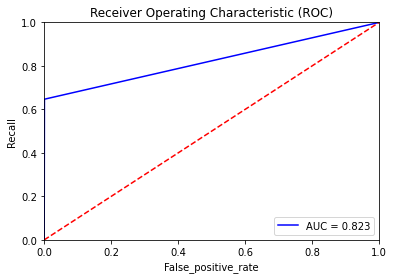

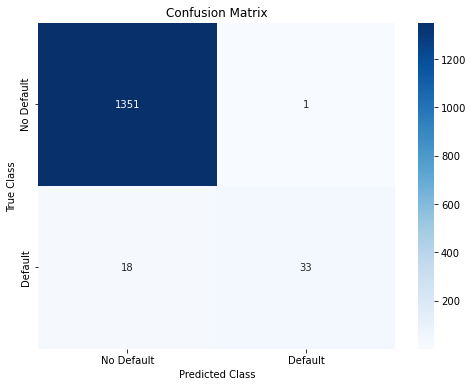

Accuracy: 0.9864575908766928
Precision(positive predictive value):0.9705882352941176
f1_score:0.7764705882352942
recall_score:0.6470588235294118



In [155]:
#Polt Area Under Curve, cofusion Matrix
plot_Scores(XGB_model,X2_test, y2_test)
#print the scores
score_res["XGB model"] =print_Scores(XGB_model,X2_test,y2_test)

## D) Feature Engineering

In [156]:
new_train_df =train_df.copy()
corr_df = train_df.corr()
corr_list = corr_df["class"].tolist()
highCorr_list = []
for attr in corr_list:
        if abs(attr) > 0.05:
            highCorr_list.append(corr_list.index(attr))
highCorr = len(highCorr_list)
print(f'There are {highCorr} columns whose abstract coorelation value are great than 0.05')
print(new_train_df.columns[highCorr_list])

There are 7 columns whose abstract coorelation value are great than 0.05
Index(['Attr2', 'Attr3', 'Attr6', 'Attr32', 'Attr51', 'Attr57', 'class'], dtype='object')


<AxesSubplot:>

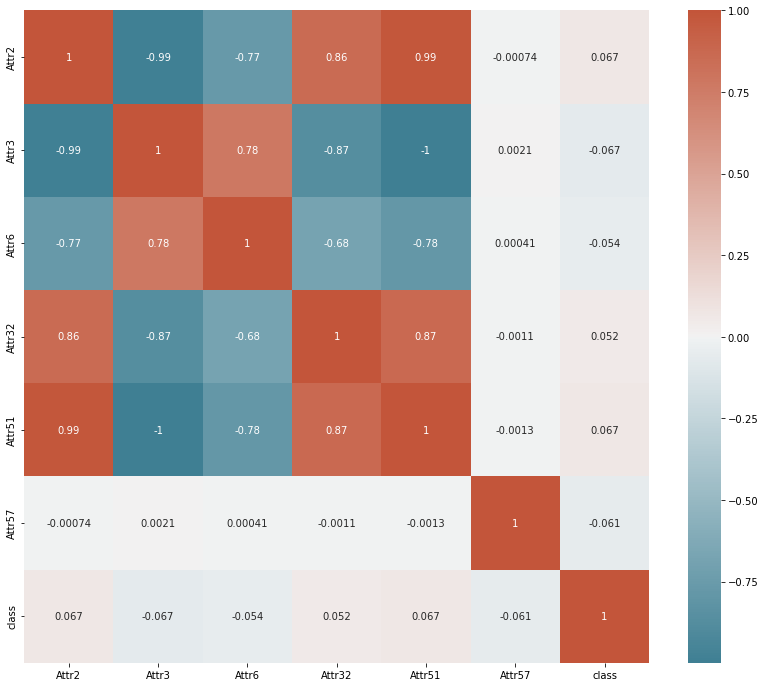

In [157]:
# From attribution info we know which is presented for each column
#X2 total liabilities / total assets
#X3 working capital / total assets
#X6 retained earnings / total assets
#X32 (current liabilities * 365) / cost of products sold
#X51 short-term liabilities / total assets
#X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
plot_df = pd.DataFrame(new_train_df, columns = new_train_df.columns[highCorr_list])
fig, ax = plt.subplots(figsize=(14,12))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(plot_df.corr(), cmap=cmap, annot=True)

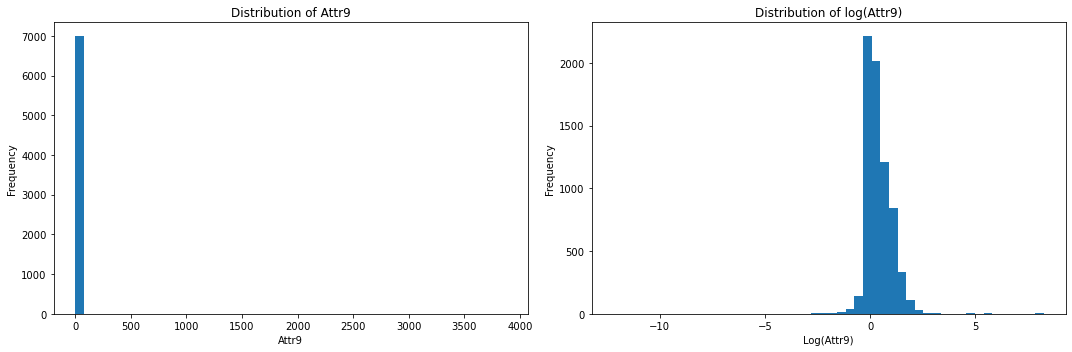

In [158]:
# explore the data of new_train_df["Attr9"]
# the feature with a gaussian distribution will be useful for the model, Thus we log the data 
# source: https://www.ritchieng.com/machine-learning-anomaly-detection/ 

Attr9 = new_train_df["Attr9"]

plt.figure(figsize= (15,5))

plt.subplot(1,2,1)
plt.hist(Attr9,bins = 50)
plt.title("Distribution of Attr9")
plt.xlabel("Attr9")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(np.log(Attr9),bins = 50)
plt.title("Distribution of log(Attr9)")
plt.xlabel("Log(Attr9)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [159]:
# try to build new features as the log of 'Attr2', 'Attr3', 'Attr6', 'Attr32', 'Attr51', 'Attr57' (Based on corr)
# and the log of 'Attr9', 'Attr11', 'Attr6', 'Attr34', 'Attr29', 'Attr27' (Based on important features)
# While only 'Attr29'and 'Attr9' can do logarithm without -inf or NAN
new_train_df['New1']=np.log10(new_train_df["Attr9"])
new_train_df['New2']=np.log10(new_train_df["Attr29"])

In [160]:
label = new_train_df['class']
new_train_df.drop(['class'], axis=1,inplace=True)
new_train_df['class']=label

2) delete column with over 20% of "0" value

In [161]:
zero_data = Checking_ZERO(new_train_df)
cols_tooMany0 = useless_features(20,zero_data)
display(cols_tooMany0)

[5, 58, 66]

In [162]:
# since columns 66 is our Label, drop column 5,58 which has too many "0"
new_train_df.drop(new_train_df.columns[[5, 58]], axis=1,inplace = True)

In [163]:
# fill the NaN with -999 in all columns
new_train_df =new_train_df.fillna(-999)

In [164]:
# check the columns with null values 
inspect_dataframe(new_train_df)

Any missing values? False



In [165]:
#80%of data to training the model, and 20% of data to test the model 
y2 = new_train_df.loc[:,"class"]
X2 = new_train_df.copy
X2 = new_train_df.drop("class", axis =1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state = 42) 

In [166]:
new_train_df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr7,Attr8,Attr9,Attr10,Attr11,...,Attr57,Attr58,Attr60,Attr61,Attr62,Attr63,Attr64,New1,New2,class
count,7012.000000,7012.000000,7012.000000,7012.000000,7.012000e+03,7012.000000,7012.000000,7012.000000,7012.000000,7012.000000,...,7012.000000,7.012000e+03,7.012000e+03,7012.000000,7.012000e+03,7012.000000,7012.000000,7012.000000,7012.000000,7012.000000
mean,-0.392728,0.132486,-0.307385,-1.654567,-2.645057e+02,-0.113043,-0.945112,5.418478,1.400817,-5.060759,...,0.051113,1.590784e+02,4.062050e+02,12.459498,4.773179e+03,3.822673,203.301361,0.036386,0.188882,0.036509
std,21.160579,21.354438,21.327015,66.707980,3.709311e+04,22.294084,62.563181,102.799434,39.689868,73.881305,...,12.700042,1.323537e+04,2.590419e+04,267.510866,3.111157e+05,68.706665,5134.416064,11.936070,20.673508,0.187566
min,-999.000000,-999.000000,-999.000000,-999.000000,-2.722100e+06,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-4.194000e-03,-9.990000e+02,-999.000000,0.000000e+00,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,0.021240,0.296095,0.026968,1.056925,-4.460450e+01,0.028145,0.440617,1.037300,0.300940,0.037486,...,0.057052,8.646675e-01,5.731950e+00,4.809100,4.320550e+01,3.400650,2.499925,0.015904,0.570458,0.000000
50%,0.076099,0.482030,0.181910,1.499950,-5.341650e+00,0.090261,1.010900,1.206250,0.492845,0.101920,...,0.176155,9.387550e-01,9.844400e+00,7.018200,6.850900e+01,5.278150,4.614700,0.081437,0.616292,0.000000
75%,0.160340,0.680153,0.362700,2.453775,3.781475e+01,0.188855,2.257325,2.133075,0.675735,0.201162,...,0.352450,9.818700e-01,1.982025e+01,10.664750,1.062575e+02,8.329650,9.741875,0.329006,0.662991,0.000000
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,453.770000,1452.200000,3876.100000,1099.500000,453.780000,...,126.670000,1.108300e+06,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000,3.588395,0.972485,1.000000


### Logistic Regression


In [167]:
logit = LogisticRegression(solver = "lbfgs")
logit.fit(X2_train, y2_train)

train_score = logit.score(X2_train, y2_train)
test_score = logit.score(X2_test, y2_test)

print(f'accuary score for training data is: {train_score}')
print(f'accuary score for test data is: {test_score}')

accuary score for training data is: 0.9602424674630059
accuary score for test data is: 0.9508196721311475


In [168]:
feature_names = new_train_df.columns
feature_names=feature_names[:-1]

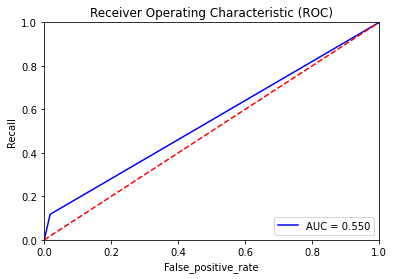

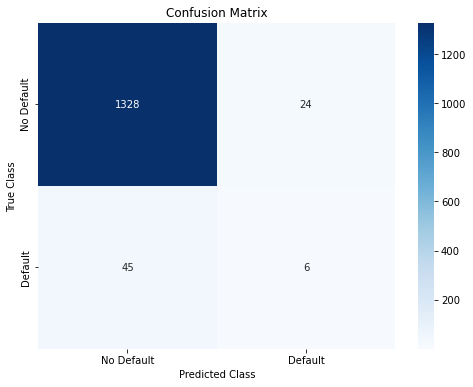

Accuracy: 0.9508196721311475
Precision(positive predictive value):0.2
f1_score:0.14814814814814817
recall_score:0.11764705882352941



In [169]:
score_res_new = pd.DataFrame(index=["AUC","ACC","Precision","Recall","F1"])
#Polt Area Under Curve, cofusion Matrix
plot_Scores(logit,X2_test, y2_test)
#print the scores
score_res_new["Logistic"] =print_Scores(logit,X2_test,y2_test)

### SVM

In [170]:
SVM_model = LinearSVC()
SVM_model.fit(X2_train,y2_train)
print("The TRAIN classification accuracy is: %3.3f" % (100 * SVM_model.score(X2_train,y2_train)))

The TRAIN classification accuracy is: 95.792


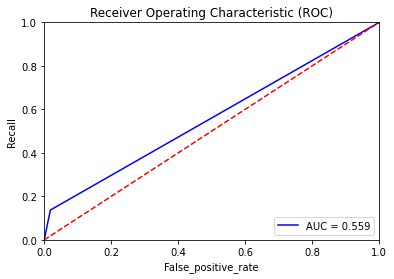

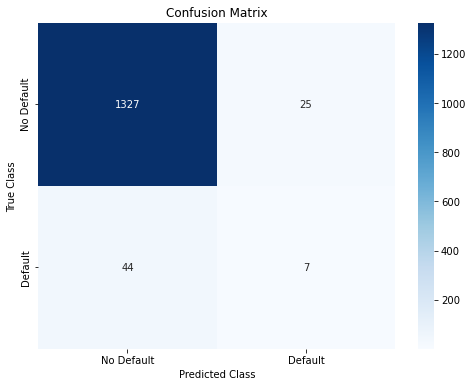

Accuracy: 0.9508196721311475
Precision(positive predictive value):0.21875
f1_score:0.16867469879518074
recall_score:0.13725490196078433



In [171]:
#Polt Area Under Curve, cofusion Matrix
plot_Scores(SVM_model,X2_test, y2_test)
#print the scores
score_res_new["SVM"] =print_Scores(SVM_model,X2_test,y2_test)

### Bagging: Random Forest

In [172]:
my_random_forest = RandomForestClassifier(n_estimators=50)
my_random_forest.fit(X2_train, y2_train)

RandomForestClassifier(n_estimators=50)

In [173]:
models = []
for model in my_random_forest.estimators_:
    models.append(model)

In [174]:
decision_tree_scores = []
for  sub_tree in my_random_forest.estimators_:
    decision_tree_scores.append(sub_tree.score(X2_test, y2_test))
    
print("Performance on fitted data:")
print("Best Decision Tree: %3.3f" % (100*max(decision_tree_scores)))
print("Worst Decision Tree: %3.3f" % (100*min(decision_tree_scores)))
print("Average Decision Tree: %3.3f" % (100*np.mean(decision_tree_scores)))
print("Random Forest: %3.3f" % (100*my_random_forest.score(X2_test, y2_test)))

Performance on fitted data:
Best Decision Tree: 96.579
Worst Decision Tree: 92.659
Average Decision Tree: 95.083
Random Forest: 98.076


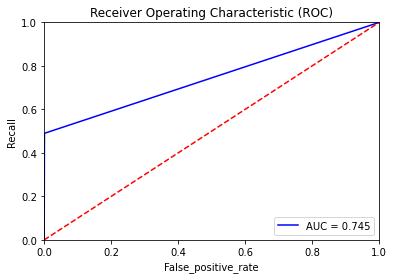

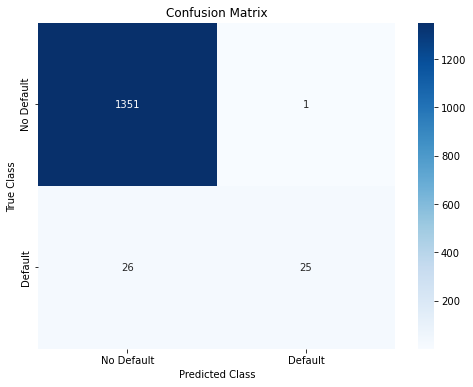

Accuracy: 0.9807555238774056
Precision(positive predictive value):0.9615384615384616
f1_score:0.6493506493506493
recall_score:0.49019607843137253



In [175]:
#Polt Area Under Curve, cofusion Matrix
plot_Scores(my_random_forest,X2_test, y2_test)
#print the scores
score_res_new["Random Forest"] =print_Scores(my_random_forest,X2_test,y2_test)

### Xgboost

In [176]:
#scalar = StandardScaler()
#scalar.fit(X2_train)
#X2_train_new = scalar.transform(X2_train)
#X2_test_new = scalar.transform(X2_test)

XGB_model = XGBClassifier()
XGB_model.fit(X2_train,y2_train)

print("XG Boost score: %3.3f" % (100 * XGB_model.score(X2_test,y2_test)))

[23:19:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost score: 98.646


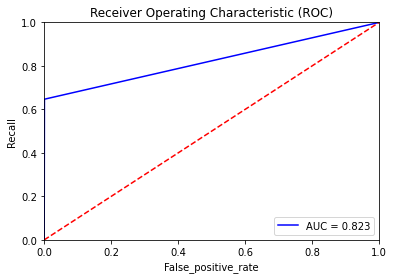

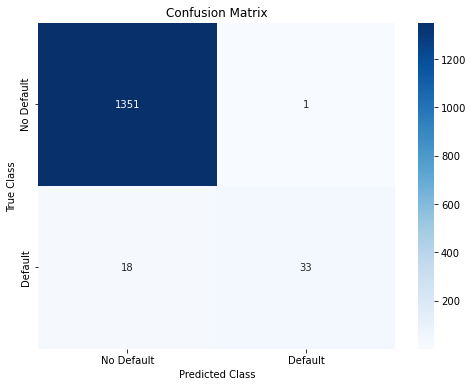

Accuracy: 0.9864575908766928
Precision(positive predictive value):0.9705882352941176
f1_score:0.7764705882352942
recall_score:0.6470588235294118



In [177]:
#Polt Area Under Curve, cofusion Matrix
plot_Scores(XGB_model,X2_test, y2_test)
#print the scores
score_res_new["XGB model"] =print_Scores(XGB_model,X2_test,y2_test)

## E) Results & Discussion

Text(0.5, 1.0, 'Score of different Models before feature engineering')

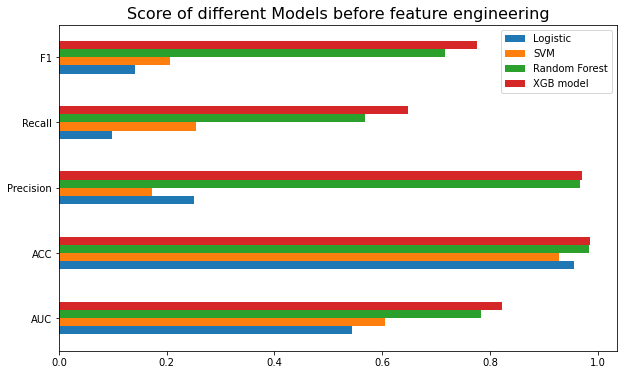

In [178]:
score_res.plot.barh(figsize=(10,6))
plt.title("Score of different Models before feature engineering", fontsize = 16)

,Logistic,SVM,Random Forest,XGB model
AUC,0.549948,0.559382,0.744728,0.823160
ACC,0.950820,0.950820,0.980756,0.986458
Precision,0.200000,0.218750,0.961538,0.970588
Recall,0.117647,0.137255,0.490196,0.647059
F1,0.148148,0.168675,0.649351,0.776471


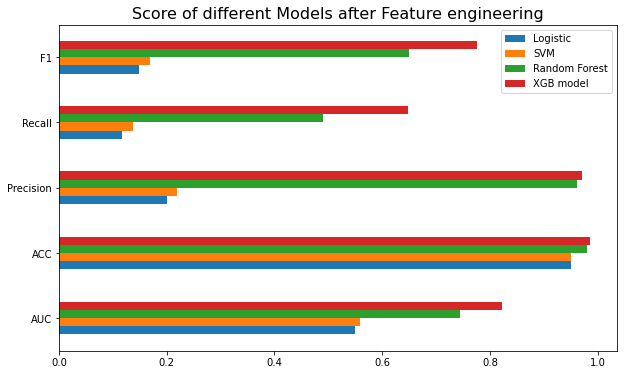

In [179]:
score_res_new.plot.barh(figsize=(10,6))
plt.title("Score of different Models after Feature engineering", fontsize = 16)
display(score_res_new)

The featuring engineering makes very little improvement for this model, since only 2 new features were built. 

XGB model is the best Model comparing to other three models, whose all 5 scores are highest.
The next step is to find the best parameter for XGB.

[23:19:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:31] WARNING: /Users/runner/miniforge3/cond

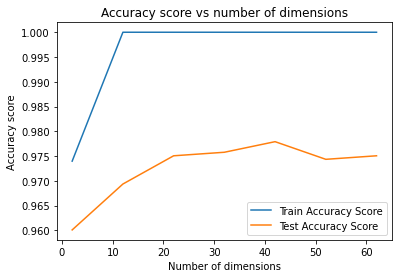

In [180]:
# reduce dimensions for improving 
warnings.filterwarnings('ignore')
train_score_list = []
num_of_compnents = []
test_score_list = []

for i in range(2, X2_train.shape[1], 10):
    # fit PCA
    my_PCA = PCA(n_components=i)
    PCA_X_train = my_PCA.fit_transform(X2_train)
    
    model = XGBClassifier()
    model.fit(PCA_X_train, y2_train)
    train_score_list.append(model.score(PCA_X_train,y2_train))
    
    
    PCA_X_test = my_PCA.transform(X2_test)
    test_score_list.append(model.score(PCA_X_test,y2_test))
    
    num_of_compnents.append(i)


plt.plot(num_of_compnents, train_score_list, label = "Train Accuracy Score")
plt.plot(num_of_compnents, test_score_list, label = "Test Accuracy Score")
plt.title("Accuracy score vs number of dimensions")
plt.xlabel("Number of dimensions")
plt.ylabel("Accuracy score")
plt.legend()
plt.show()

In [181]:
#find the best n_componet with highest test score
find_n_component = pd.DataFrame(test_score_list, index=num_of_compnents)
best_n_component = find_n_component.iloc[:,0].idxmax()
print(f'the best n_component is: {best_n_component}')

the best n_component is: 42


In [101]:
# using GridSearchCV to find the best parameter
cachedir = mkdtemp()

estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA()),
              ('model', XGBClassifier(eval_metric='auc',objective='binary:logistic'))]

pipe = Pipeline(estimators, memory = cachedir)

param_grid = [{'normalise':[StandardScaler(),None],
               # from above, the best n_components is 42.
               'reduce_dim':[PCA(n_components=42), None],
               'model': [XGBClassifier(eval_metric='auc',objective='binary:logistic')], 
               'model__gamma': [0.5, 1, 5],
               'model__max_depth': [1, 5, 10]
              }]

grid_search = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv=5)

In [102]:
# This code will run 30 minutes
fitted_search = grid_search.fit(X2_train, y2_train)

In [182]:
fitted_search.best_params_

{'model': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, eval_metric='auc', gamma=1, gpu_id=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=5,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, reg_alpha=None,
               reg_lambda=None, scale_pos_weight=None, subsample=None,
               tree_method=None, validate_parameters=None, verbosity=None),
 'model__gamma': 1,
 'model__max_depth': 5,
 'normalise': StandardScaler(),
 'reduce_dim': None}

In [183]:
params = {
     'objective': 'binary:logistic',
     'eval_metric': "auc",
     'model__gamma': 1,
     'model__max_depth': 5,
     'normalise': StandardScaler(),
     'reduce_dim': None}

columns = X2_train.columns
splits = folds.split(X2_train, y2_train)
y_preds = np.zeros(X2_test.shape[0])
y_oof = np.zeros(X2_train.shape[0])
score = 0


for fold_n, (train_index, valid_index) in enumerate(splits):
    
    X_train, X_valid = X2_train.iloc[train_index], X2_train.iloc[valid_index]
    y_train, y_valid = y2_train.iloc[train_index], y2_train.iloc[valid_index]
    
    dtrain = xgb.DMatrix(X_train, label=y_train, missing=-999)
    dvalid = xgb.DMatrix(X_valid, label=y_valid, missing=-999)

    evals=[(dtrain,'train'),(dvalid,'valid')]

    xgbclf = xgb.train(params, dtrain, evals=evals, early_stopping_rounds=10)
    
    y_pred_valid = xgbclf.predict(xgb.DMatrix(X_valid))
    
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / n_folds
    y_preds += xgbclf.predict(xgb.DMatrix(X2_test)) / n_folds
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f"\nMean AUC = {score}")

[23:21:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "model__gamma", "model__max_depth", "normalise" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.81493	valid-auc:0.78096
[1]	train-auc:0.82730	valid-auc:0.78103
[2]	train-auc:0.90443	valid-auc:0.86687
[3]	train-auc:0.91501	valid-auc:0.86574
[4]	train-auc:0.93979	valid-auc:0.88652
[5]	train-auc:0.94696	valid-auc:0.88836
[6]	train-auc:0.95599	valid-auc:0.89691
[7]	train-auc:0.97933	valid-auc:0.92949
[8]	train-auc:0.98769	valid-auc:0.93539
[9]	train-auc:0.98934	valid-auc:0.93524
Fold 1 | AUC: 0.9061045158286778
[23:21:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576

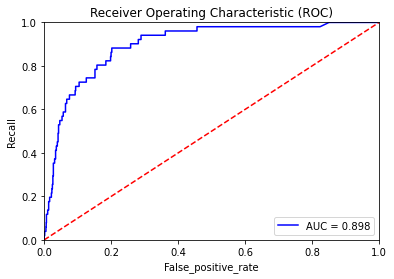

In [184]:
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y2_test, y_preds)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('False_positive_rate')
plt.show()

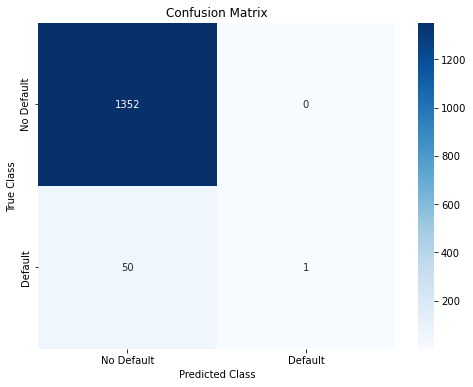

Accuracy: 0.9643620812544548
Precision(positive predictive value):1.0
f1_score:0.038461538461538464
recall_score:0.0196078431372549


In [185]:
#Print Confusion Matrix
#Set threshold=0.5
cm = confusion_matrix(y2_test, y_preds.round())
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

acc = accuracy_score(y2_test, y_preds.round())
precision = precision_score(y2_test, y_preds.round())
f1 = f1_score(y2_test, y_preds.round())
recall = recall_score(y2_test, y_preds.round())
print(f'Accuracy: {acc}')
print(f'Precision(positive predictive value):{precision}')
print(f'f1_score:{f1}')
print(f'recall_score:{recall}')

After hyperparameter optimization, AUC increases to 0.898 and precision reaching to 1. But the reacll is very low due to the higher FN. While our target is the high AUC and precision score, which are already achieved.

## F) Limitations
1) Just used 1stYear.csv, don't have time to build models for 2stYear.csv-5stYear.csv. 

2) Feature engineering with domain knowledge. Spending lots of time doing feature engineering, by droping the features with low coefficient and building new features based on high coefficient or importance features, which even makes the model's score lower. More stronger understanding in this domain may be more helpful to build new features. 

3) Feature engineering with Gausssian distribution. Learned from Andrew Ng's deep learning courses, conducting logarithm to the current features can build more powerful features. While after trying top 12 high coefficient feature and most important features, only 2 new features are built, which makes very limited impact to the model results.

4) Improvement of modelling. 1) More models should be selected, such as CatBoost, LightGBM and Neural network; 2) Better parameter understanding for each model.